In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter

In [2]:
nested_loop_color = '#023047'
nested_loop_index_color = '#219ebc'
sort_merge_color = '#ffb703'
hash_color = '#c44900'

nested_loop_index_light_color = '#90cede'
sort_merge_light_color = '#ffdb81'
hash_light_color = '#e2a480'
import matplotlib.colors as mcolors

def lighten_color(hex_color, amount=0.5):
    # Convert hex color to RGB
    rgb = mcolors.hex2color(hex_color)
    # Lighten the color by blending with white
    light_rgb = [(1 - amount) * c + amount for c in rgb]
    # Convert back to hex
    light_hex = mcolors.to_hex(light_rgb)
    return light_hex

# Original color
original_color = "#c44900"
# Lightened color
lightened_color = lighten_color(original_color, amount=0.5)  # You can adjust the amount for more or less pale

print("Original color:", original_color)
print("Lightened color:", lightened_color)


Original color: #c44900
Lightened color: #e2a480


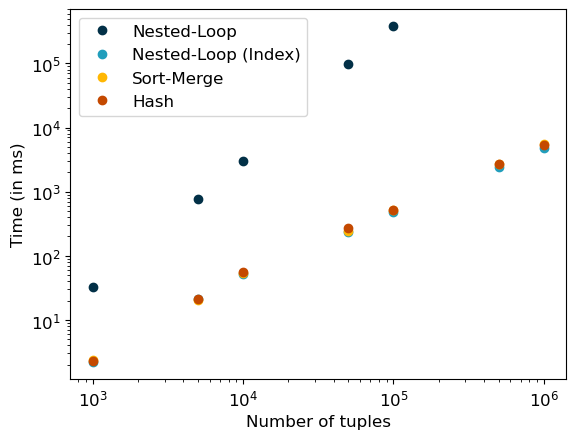

In [3]:
# Sample data
nested_loop = [31952985.417, 769975221.429, 3011838164.286, 97161837364.286, 383987770914.286, 0, 0]
nested_loop_index = [2193258.594, 21181518.750, 50966336.429, 232500257.778, 477103869.231, 2436141180.000, 4808891407.143]
sort_merge = [2322767.718, 20669728.125, 53767633.103, 246782323.333, 514282525.000,  2699285380.000,  5542651907.143]
hash = [2260057.091, 21300650.240, 56660316.374, 272531624.444, 518440778.571, 2667133271.429, 5311574085.714]
x = [1000, 5000, 10000, 50000, 100000, 500000, 1000000]


nested_loop = [x * 0.000001 for x in nested_loop]
nested_loop_index = [x * 0.000001 for x in nested_loop_index]
sort_merge = [x * 0.000001 for x in sort_merge]
hash = [x * 0.000001 for x in hash]

# Create a plot
plt.figure()
plt.plot(x, nested_loop, marker='o', linestyle='', color=nested_loop_color, label='Nested-Loop')
plt.plot(x, nested_loop_index, marker='o', linestyle='', color=nested_loop_index_color, label='Nested-Loop (Index)')
plt.plot(x, sort_merge, marker='o', linestyle='', color=sort_merge_color, label='Sort-Merge')
plt.plot(x, hash, marker='o', linestyle='', color=hash_color, label='Hash')

plt.xscale('log')
plt.yscale('log')

# Add titles and labels
# plt.title('Authors ⋈ Books (Authors are ordered)')
plt.ylabel('Time (in ms)', fontsize = 12)
plt.xlabel('Number of tuples', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize=12)

# Save the plot as an SVG file
plt.savefig('joins_points_with_nl.svg', format='svg', bbox_inches='tight')
plt.savefig('joins_points_with_nl.pdf', format='pdf', bbox_inches='tight')

# Display the plot (optional)
plt.show()

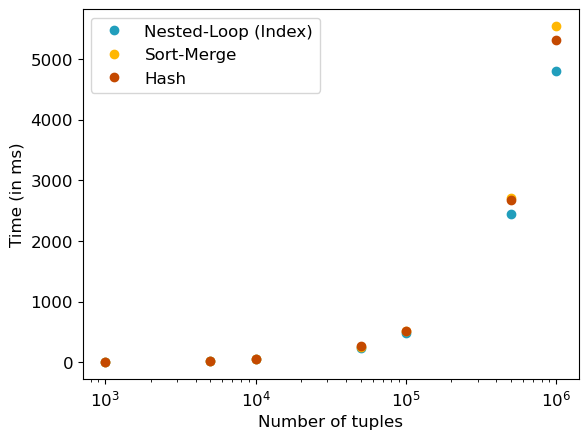

In [4]:
plt.figure()
plt.plot(x, nested_loop_index, marker='o', linestyle='', color=nested_loop_index_color, label='Nested-Loop (Index)')
plt.plot(x, sort_merge, marker='o', linestyle='', color=sort_merge_color, label='Sort-Merge')
plt.plot(x, hash, marker='o', linestyle='', color=hash_color, label='Hash')

plt.xscale('log')

# Add titles and labels
# plt.title('Authors ⋈ Books (Authors are ordered)')
plt.ylabel('Time (in ms)', fontsize = 12)
plt.xlabel('Number of tuples', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 12)

# Save the plot as an SVG file
plt.savefig('joins_points_without_nl.svg', format='svg', bbox_inches='tight')
plt.savefig('joins_points_without_nl.pdf', format='pdf', bbox_inches='tight')


# Display the plot (optional)
plt.show()

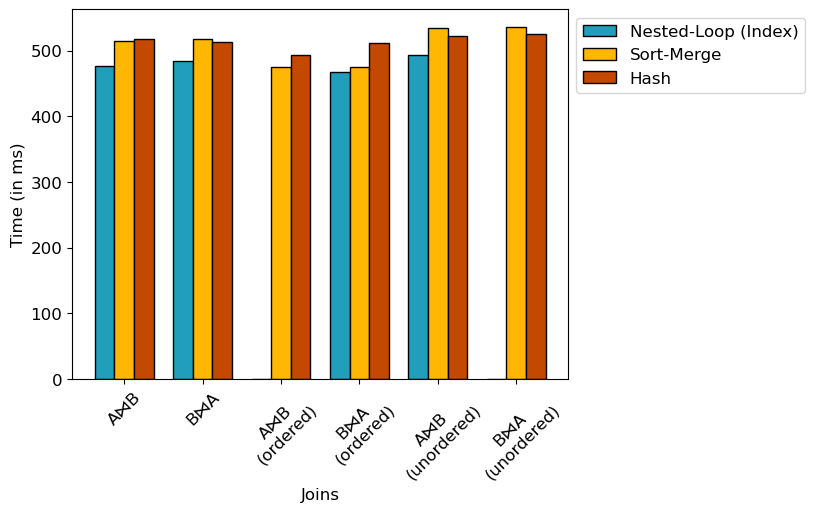

In [5]:
# Sample data
categories = ['A⋈B', 'B⋈A', 'A⋈B\n(ordered)', 'B⋈A\n(ordered)', 'A⋈B\n(unordered)', 'B⋈A\n(unordered)']
# nested_loop = [383987770914.286, 360198650278.571, 1244260446846.667, 360708345850.000, 375254648946.667, 916697988113.333]
nested_loop_index = [477103869.231, 484733913.333, 0, 468188960.000, 492864514.286, 0]
sort_merge = [514282525.000, 517738186.667, 475249575.000, 474560664.286, 534618073.333, 535929606.667]
hash = [518440778.571, 513616806.667, 493796505.556, 511032380.000, 522380420.000, 525243653.333]

# nested_loop = [x * 0.000001 for x in nested_loop]
nested_loop_index = [x * 0.000001 for x in nested_loop_index]
sort_merge = [x * 0.000001 for x in sort_merge]
hash = [x * 0.000001 for x in hash]

# Number of bars per category
bar_width = 0.25
index = np.arange(len(categories))

# Create a grouped bar chart
plt.figure()
# plt.bar(index, nested_loop, bar_width, label='Nested-Loop', color=nested_loop_color)
plt.bar(index, nested_loop_index, bar_width, label='Nested-Loop (Index)',edgecolor='black', color=nested_loop_index_color)
plt.bar(index + bar_width, sort_merge, bar_width, label='Sort-Merge',edgecolor='black', color=sort_merge_color)
plt.bar(index + bar_width + bar_width, hash, bar_width, label='Hash',edgecolor='black', color=hash_color)
# plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# plt.ylim(300000, None)

# Add titles and labels
# plt.title('Comparison for the dataset with 100,000 rows')
plt.xlabel('Joins', fontsize=12)
plt.ylabel('Time (in ms)', fontsize=12)
plt.xticks(index + bar_width / 1, categories, fontsize=12)
plt.xticks(rotation=45)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 12)

# Display the plot
plt.savefig('joins_bar_100000_without_nl.svg', format='svg', bbox_inches='tight')
plt.savefig('joins_bar_100000_without_nl.pdf', format='pdf', bbox_inches='tight')

plt.show()

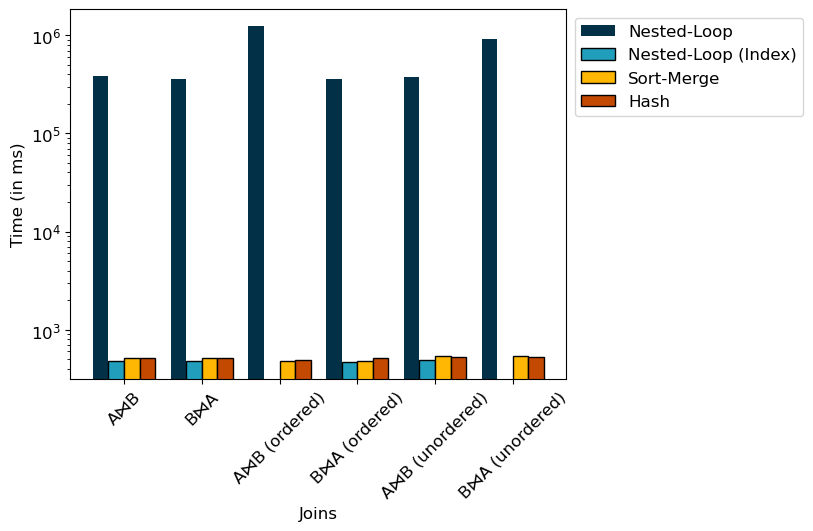

In [6]:
import numpy as np
from matplotlib.ticker import ScalarFormatter
# Sample data
categories = ['A⋈B', 'B⋈A', 'A⋈B (ordered)', 'B⋈A (ordered)', 'A⋈B (unordered)', 'B⋈A (unordered)']
nested_loop = [383987770914.286, 360198650278.571, 1244260446846.667, 360708345850.000, 375254648946.667, 916697988113.333]
nested_loop_index = [477103869.231, 484733913.333, 0, 468188960.000, 492864514.286, 0]
sort_merge = [514282525.000, 517738186.667, 475249575.000, 474560664.286, 534618073.333, 535929606.667]
hash = [518440778.571, 513616806.667, 493796505.556, 511032380.000, 522380420.000, 525243653.333]

nested_loop = [x * 0.000001 for x in nested_loop]
nested_loop_index = [x * 0.000001 for x in nested_loop_index]
sort_merge = [x * 0.000001 for x in sort_merge]
hash = [x * 0.000001 for x in hash]

# Number of bars per category
bar_width = 0.2
index = np.arange(len(categories))

# Create a grouped bar chart
plt.figure()
plt.bar(index, nested_loop, bar_width, label='Nested-Loop', color=nested_loop_color)
plt.bar(index + bar_width, nested_loop_index, bar_width, label='Nested-Loop (Index)',edgecolor='black', color=nested_loop_index_color)
plt.bar(index + bar_width + bar_width, sort_merge, bar_width, label='Sort-Merge',edgecolor='black', color=sort_merge_color)
plt.bar(index + bar_width + bar_width + bar_width, hash, bar_width, label='Hash',edgecolor='black', color=hash_color)
# plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# plt.ylim(300000, None)

plt.yscale('log')
# Add titles and labels
# plt.title('Comparison for the dataset with 100,000 rows')
plt.xlabel('Joins', fontsize=12)
plt.ylabel('Time (in ms)', fontsize=12)
plt.xticks(index + bar_width +0.1, categories, fontsize=12)
plt.xticks(rotation=45)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 12)

# Display the plot
plt.savefig('joins_bar_100000_with_nl.svg', format='svg', bbox_inches='tight')
plt.savefig('joins_bar_100000_with_nl.pdf', format='pdf', bbox_inches='tight')

plt.show()

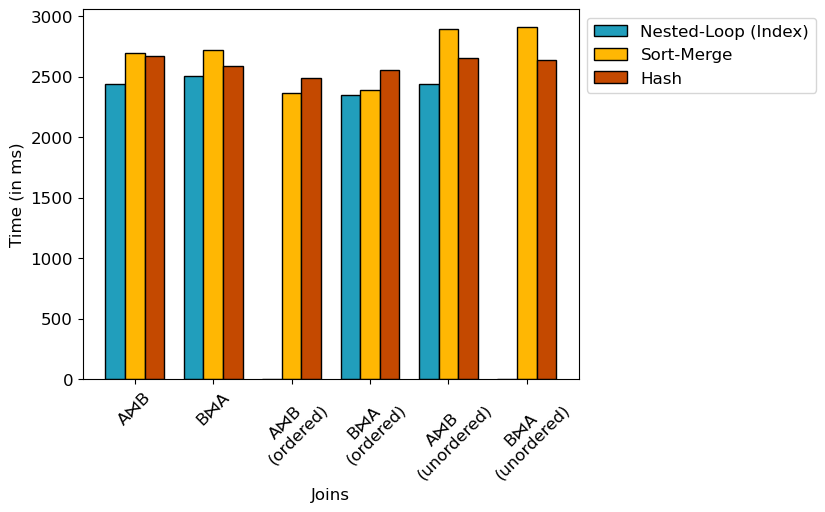

In [7]:
categories = ['A⋈B', 'B⋈A', 'A⋈B\n(ordered)', 'B⋈A\n(ordered)', 'A⋈B\n(unordered)', 'B⋈A\n(unordered)']
nested_loop_index = [2436141180.000, 2505514340.000, 0, 2349230200.000, 2442756550.000, 0]
sort_merge = [2699285380.000, 2723506760.000, 2367954540.000, 2390025026.667, 2890031240.000, 2910033800.000]
hash = [2667133271.429, 2585363020.000, 2492650800.000, 2554159533.333, 2654049346.667, 2636083613.333]

nested_loop = [x * 0.000001 for x in nested_loop]
nested_loop_index = [x * 0.000001 for x in nested_loop_index]
sort_merge = [x * 0.000001 for x in sort_merge]
hash = [x * 0.000001 for x in hash]

# Number of bars per category
bar_width = 0.25
index = np.arange(len(categories))

# Create a grouped bar chart
plt.figure()
plt.bar(index, nested_loop_index, bar_width, label='Nested-Loop (Index)',edgecolor='black', color=nested_loop_index_color)
plt.bar(index + bar_width, sort_merge, bar_width, label='Sort-Merge',edgecolor='black', color=sort_merge_color)
plt.bar(index + bar_width + bar_width, hash, bar_width, label='Hash',edgecolor='black', color=hash_color)
# plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# plt.ylim(300000, None)

# plt.yscale('log')
# Add titles and labels
# plt.title('Comparison for the dataset with 500,000 rows', fontsize = 12)
plt.xlabel('Joins', fontsize=12)
plt.ylabel('Time (in ms)', fontsize=12)
plt.xticks(index + bar_width / 1, categories, fontsize=12)
plt.xticks(rotation=45)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 12)
plt.savefig('joins_bar_500000_without_nl.svg', format='svg', bbox_inches='tight')
plt.savefig('joins_bar_500000_without_nl.pdf', format='pdf', bbox_inches='tight')

# Display the plot
plt.show()

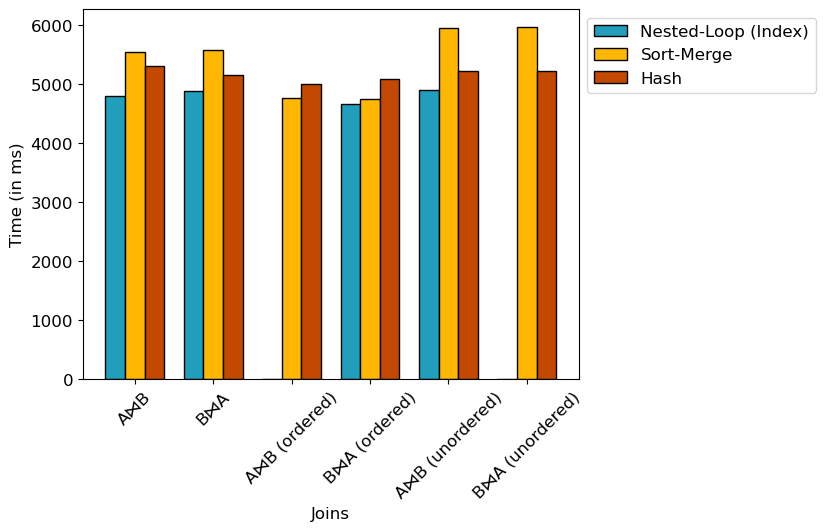

In [8]:
categories = ['A⋈B', 'B⋈A', 'A⋈B (ordered)', 'B⋈A (ordered)', 'A⋈B (unordered)', 'B⋈A (unordered)']
nested_loop_index = [4808891407.143, 4891159557.143, 0, 4670181000.000, 4903936753.333, 0]
sort_merge = [5542651907.143, 5582455042.857, 4770540226.667 , 4754536526.667, 5959464860.000, 5975271940.000]
hash = [  5311574085.714,  5153768640.000,  5000839992.857,  5082086060.000, 5231530300.000,  5217985876.923  ]

nested_loop = [x * 0.000001 for x in nested_loop]
nested_loop_index = [x * 0.000001 for x in nested_loop_index]
sort_merge = [x * 0.000001 for x in sort_merge]
hash = [x * 0.000001 for x in hash]

# Number of bars per category
bar_width = 0.25
index = np.arange(len(categories))

# Create a grouped bar chart
plt.figure()
plt.bar(index, nested_loop_index, bar_width, label='Nested-Loop (Index)',edgecolor='black', color=nested_loop_index_color)
plt.bar(index + bar_width, sort_merge, bar_width, label='Sort-Merge',edgecolor='black', color=sort_merge_color)
plt.bar(index + bar_width + bar_width, hash, bar_width, label='Hash',edgecolor='black', color=hash_color)
# plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# plt.ylim(300000, None)

# plt.yscale('log')
# Add titles and labels
# plt.title('Comparison for the dataset with 1,000,000 rows')
plt.xlabel('Joins', fontsize=12)
plt.ylabel('Time (in ms)', fontsize=12)
plt.xticks(index + bar_width / 1, categories, fontsize=12)
plt.xticks(rotation=45)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 12)
plt.savefig('joins_bar_1000000_without_nl.svg', format='svg', bbox_inches='tight')
plt.savefig('joins_bar_1000000_without_nl.pdf', format='pdf', bbox_inches='tight')

# Display the plot
plt.show()

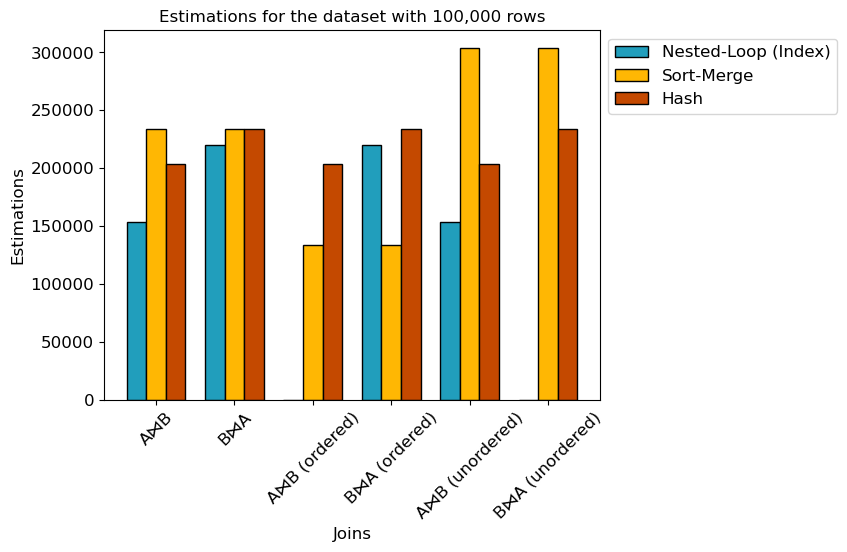

In [9]:
categories = ['A⋈B', 'B⋈A', 'A⋈B (ordered)', 'B⋈A (ordered)', 'A⋈B (unordered)', 'B⋈A (unordered)']
nested_loop = [1400014000,1400020000, 1400014000,1400020000,1400014000,1400020000]
nested_loop_index = [154000,220000, 0,220000,154000,0]
sort_merge = [234000,234000, 134000,134000,304000,304000]
hash = [204000,234000, 204000,234000,204000,234000]


# Number of bars per category
bar_width = 0.25
index = np.arange(len(categories))

# Create a grouped bar chart
plt.figure()
# plt.bar(index, nested_loop, bar_width, label='Nested-Loop', color=nested_loop_color)
# plt.bar(index + bar_width, nested_loop_index, bar_width, label='Nested-Loop (Index)', color=nested_loop_index_color)
# plt.bar(index + bar_width + bar_width, sort_merge, bar_width, label='Sort-Merge', color=sort_merge_color)
# plt.bar(index + bar_width + bar_width + bar_width, hash, bar_width, label='Hash', color=hash_color)

plt.bar(index, nested_loop_index, bar_width, label='Nested-Loop (Index)',edgecolor='black', color=nested_loop_index_color)
plt.bar(index + bar_width, sort_merge, bar_width, label='Sort-Merge',edgecolor='black', color=sort_merge_color)
plt.bar(index + bar_width + bar_width, hash, bar_width, label='Hash',edgecolor='black', color=hash_color)
# plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# plt.ylim(300000, None)

# plt.yscale('log')
# Add titles and labels
plt.title('Estimations for the dataset with 100,000 rows')
plt.xlabel('Joins', fontsize=12)
plt.ylabel('Estimations', fontsize=12)
plt.xticks(index + bar_width / 1, categories, fontsize=12)
plt.xticks(rotation=45)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 12)

# Display the plot
plt.savefig('joins_bar_estimations_100000_with_nl.svg', format='svg', bbox_inches='tight')
plt.savefig('joins_bar_estimations_100000_with_nl.pdf', format='pdf', bbox_inches='tight')

plt.show()

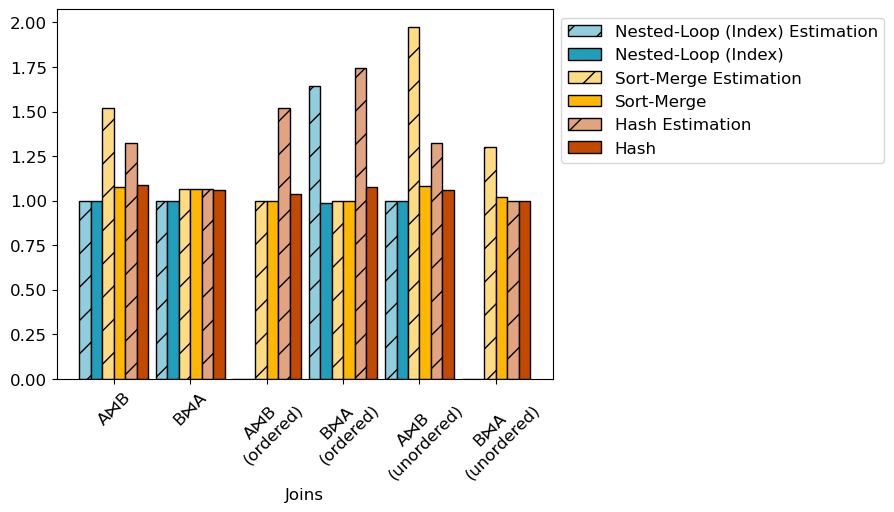

[1.0, 1.0, 0, 0.9865734672813926, 1.0, 0]

In [10]:
categories = ['A⋈B', 'B⋈A', 'A⋈B\n(ordered)', 'B⋈A\n(ordered)', 'A⋈B\n(unordered)', 'B⋈A\n(unordered)']

nested_loop_index_act = [477103869.231, 484733913.333, 0, 468188960.000, 492864514.286, 0]
sort_merge_act = [514282525.000, 517738186.667, 475249575.000, 474560664.286, 534618073.333, 535929606.667]
hash_act = [518440778.571, 513616806.667, 493796505.556, 511032380.000, 522380420.000, 525243653.333]

nested_loop_index_est = [154000,220000, 0,220000,154000,0]
sort_merge_est = [234000,234000, 134000,134000,304000,304000]
hash_est = [204000,234000, 204000,234000,204000,234000]

best_est = [nested_loop_index_est[0], nested_loop_index_est[1], sort_merge_est[2], sort_merge_est[3], nested_loop_index_est[4], hash_est[5]]
comp_nli_est = [0 if x == 0 else x / best for x, best in zip(nested_loop_index_est, best_est)]
comp_sm_est = [ x / best for x, best in zip(sort_merge_est, best_est)]
comp_hash_est = [x / best for x, best in zip(hash_est, best_est)]

best_act = [nested_loop_index_act[0], nested_loop_index_act[1], sort_merge_act[2], sort_merge_act[3], nested_loop_index_act[4], hash_act[5]]
comp_nli_act = [0 if x == 0 else x / best for x, best in zip(nested_loop_index_act, best_act)]
comp_sm_act = [ x / best for x, best in zip(sort_merge_act, best_act)]
comp_hash_act = [x / best for x, best in zip(hash_act, best_act)]

# comp_nli_est = [0 if x == 0 else (x - 1) * 100 for x in comp_nli_est]
# comp_sm_est = [(x - 1) * 100 for x in comp_sm_est]
# comp_hash_est = [(x - 1) * 100 for x in comp_hash_est]

# comp_nli_act = [0 if x == 0 else (x - 1) * 100 for x in comp_nli_act]
# comp_sm_act = [(x - 1) * 100 for x in comp_sm_act]
# comp_hash_act = [(x - 1) * 100 for x in comp_hash_act]


# Number of bars per category
bar_width = 0.15
index = np.arange(len(categories))

# Create a grouped bar chart
plt.figure()

plt.bar(index, comp_nli_est, bar_width, label='Nested-Loop (Index) Estimation', edgecolor='black',hatch='/', color=nested_loop_index_light_color)
plt.bar(index + bar_width, comp_nli_act, bar_width, label='Nested-Loop (Index)', edgecolor='black', color=nested_loop_index_color)
plt.bar(index + bar_width + bar_width, comp_sm_est, bar_width, label='Sort-Merge Estimation', edgecolor='black',hatch='/', color=sort_merge_light_color)
plt.bar(index + bar_width + bar_width + bar_width, comp_sm_act, bar_width, label='Sort-Merge', edgecolor='black', color=sort_merge_color)
plt.bar(index + bar_width + bar_width + bar_width + bar_width, comp_hash_est, bar_width, label='Hash Estimation', edgecolor='black',hatch='/', color=hash_light_color)
plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width, comp_hash_act, bar_width, label='Hash', edgecolor='black', color=hash_color)
# plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# plt.ylim(300000, None)

# plt.yscale('log')
# Add titles and labels
# plt.title('Performance comparison by which factor the estimations and the actual performance \n are faster/slower than the fastest estimated operator (100,000 rows)')
# plt.xlabel('Joins')
# # plt.ylabel('Factor of t')
# plt.xticks(index + bar_width + 0.15, categories)
# plt.xticks(rotation=45)
# plt.legend()

plt.xlabel('Joins', fontsize=12)
# plt.ylabel('Factor of t')
plt.xticks(index + bar_width + 0.225, categories, fontsize=12)
plt.xticks(rotation=45)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 12)

# Display the plot
plt.savefig('joins_est_act_100000.svg', format='svg', bbox_inches='tight')
plt.savefig('joins_est_act_100000.pdf', format='pdf', bbox_inches='tight')

plt.show()
# comp_nli_est
# comp_sm_est
# comp_hash_est

comp_nli_act
# comp_sm_act
# comp_hash_act

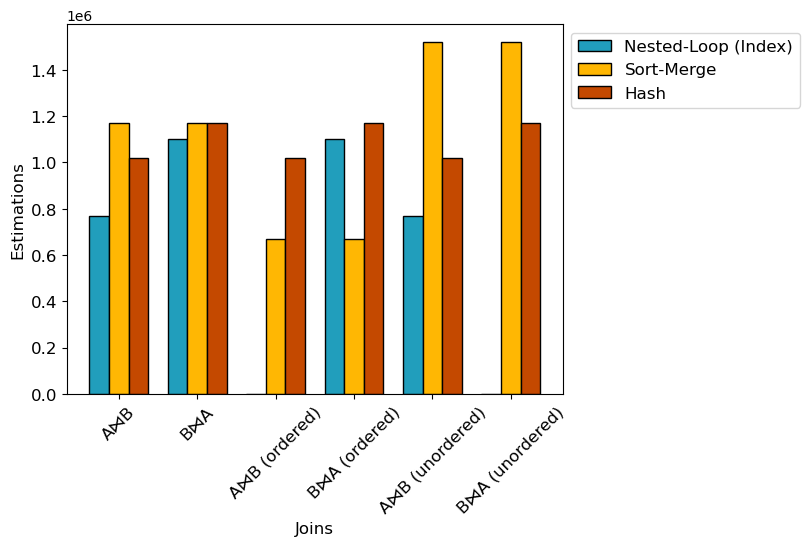

In [11]:
categories = ['A⋈B', 'B⋈A', 'A⋈B (ordered)', 'B⋈A (ordered)', 'A⋈B (unordered)', 'B⋈A (unordered)']
nested_loop = [35000070000,35000100000, 35000070000,35000100000,35000070000,35000100000]
nested_loop_index = [770000,1100000, 0,1100000,770000,0]
sort_merge = [1170000,1170000, 670000,670000,1520000,1520000]
hash = [1020000,1170000, 1020000,1170000,1020000,1170000]


# Number of bars per category
bar_width = 0.25
index = np.arange(len(categories))

# Create a grouped bar chart
plt.figure()
# plt.bar(index, nested_loop, bar_width, label='Nested-Loop', color=nested_loop_color)
# plt.bar(index + bar_width, nested_loop_index, bar_width, label='Nested-Loop (Index)', color=nested_loop_index_color)
# plt.bar(index + bar_width + bar_width, sort_merge, bar_width, label='Sort-Merge', color=sort_merge_color)
# plt.bar(index + bar_width + bar_width + bar_width, hash, bar_width, label='Hash', color=hash_color)

plt.bar(index, nested_loop_index, bar_width, label='Nested-Loop (Index)',edgecolor='black', color=nested_loop_index_color)
plt.bar(index + bar_width, sort_merge, bar_width, label='Sort-Merge',edgecolor='black', color=sort_merge_color)
plt.bar(index + bar_width + bar_width, hash, bar_width, label='Hash',edgecolor='black', color=hash_color)
# plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# plt.ylim(300000, None)

# plt.yscale('log')
# Add titles and labels
# plt.title('Estimations for the dataset with 500,000 rows')
plt.xlabel('Joins', fontsize=12)
plt.ylabel('Estimations', fontsize=12)
plt.xticks(index + bar_width / 1, categories, fontsize=12)
plt.xticks(rotation=45)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 12)

# Display the plot
plt.savefig('joins_bar_estimations_500000_with_nl.svg', format='svg', bbox_inches='tight')
plt.savefig('joins_bar_estimations_500000_with_nl.pdf', format='pdf', bbox_inches='tight')

plt.show()

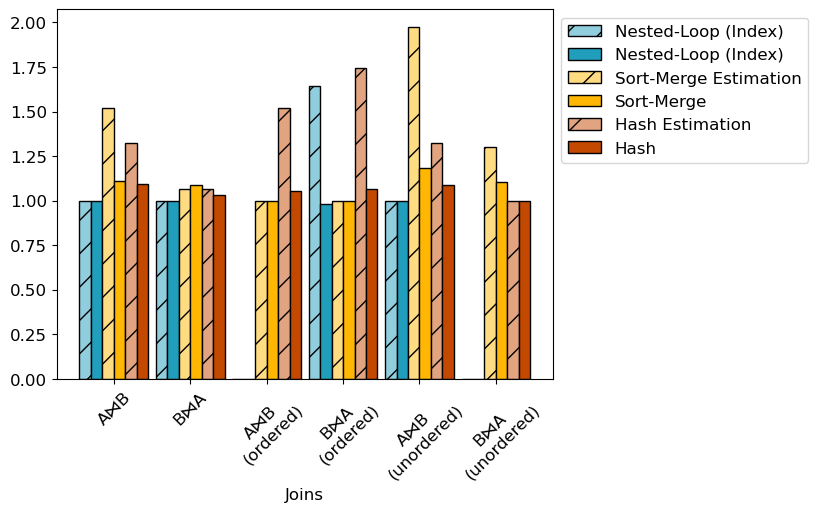

In [12]:
categories = ['A⋈B', 'B⋈A', 'A⋈B\n(ordered)', 'B⋈A\n(ordered)', 'A⋈B\n(unordered)', 'B⋈A\n(unordered)']
nested_loop_index_act = [2436141180.000, 2505514340.000, 0, 2349230200.000, 2442756550.000, 0]
sort_merge_act = [2699285380.000, 2723506760.000, 2367954540.000, 2390025026.667, 2890031240.000, 2910033800.000]
hash_act = [2667133271.429, 2585363020.000, 2492650800.000, 2554159533.333, 2654049346.667, 2636083613.333]

nested_loop_index_est = [770000,1100000, 0,1100000,770000,0]
sort_merge_est = [1170000,1170000, 670000,670000,1520000,1520000]
hash_est = [1020000,1170000, 1020000,1170000,1020000,1170000]

best_est = [nested_loop_index_est[0], nested_loop_index_est[1], sort_merge_est[2], sort_merge_est[3], nested_loop_index_est[4], hash_est[5]]
comp_nli_est = [0 if x == 0 else x / best for x, best in zip(nested_loop_index_est, best_est)]
comp_sm_est = [ x / best for x, best in zip(sort_merge_est, best_est)]
comp_hash_est = [x / best for x, best in zip(hash_est, best_est)]

best_act = [nested_loop_index_act[0], nested_loop_index_act[1], sort_merge_act[2], sort_merge_act[3], nested_loop_index_act[4], hash_act[5]]
comp_nli_act = [0 if x == 0 else x / best for x, best in zip(nested_loop_index_act, best_act)]
comp_sm_act = [ x / best for x, best in zip(sort_merge_act, best_act)]
comp_hash_act = [x / best for x, best in zip(hash_act, best_act)]

# Number of bars per category
bar_width = 0.15
index = np.arange(len(categories))

# Create a grouped bar chart
plt.figure()

plt.bar(index, comp_nli_est, bar_width, label='Nested-Loop (Index)', edgecolor='black',hatch='/', color=nested_loop_index_light_color)
plt.bar(index + bar_width, comp_nli_act, bar_width, label='Nested-Loop (Index)', edgecolor='black', color=nested_loop_index_color)
plt.bar(index + bar_width + bar_width, comp_sm_est, bar_width, label='Sort-Merge Estimation', edgecolor='black',hatch='/', color=sort_merge_light_color)
plt.bar(index + bar_width + bar_width + bar_width, comp_sm_act, bar_width, label='Sort-Merge', edgecolor='black', color=sort_merge_color)
plt.bar(index + bar_width + bar_width + bar_width + bar_width, comp_hash_est, bar_width, label='Hash Estimation', edgecolor='black',hatch='/', color=hash_light_color)
plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width, comp_hash_act, bar_width, label='Hash', edgecolor='black', color=hash_color)
# plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# plt.ylim(300000, None)

# plt.yscale('log')
# Add titles and labels
plt.xlabel('Joins', fontsize=12)
# plt.ylabel('Factor of t')
plt.xticks(index + bar_width + 0.225, categories, fontsize=12)
plt.xticks(rotation=45)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 12)

# Display the plot
plt.savefig('joins_est_act_500000.svg', format='svg', bbox_inches='tight')
plt.savefig('joins_est_act_500000.pdf', format='pdf', bbox_inches='tight')

plt.show()

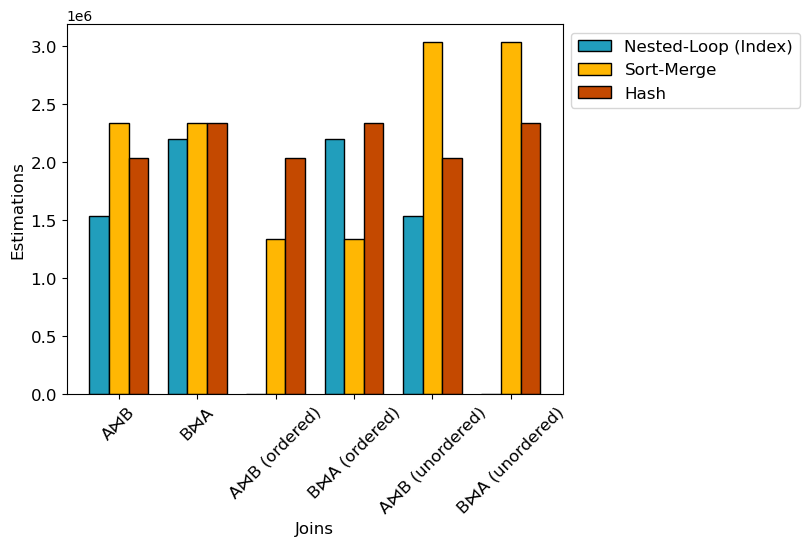

In [13]:
categories = ['A⋈B', 'B⋈A', 'A⋈B (ordered)', 'B⋈A (ordered)', 'A⋈B (unordered)', 'B⋈A (unordered)']
nested_loop = [140000140000,140000200000, 140000140000,140000200000,140000140000,140000200000]
nested_loop_index = [1540000,2200000, 0,2200000,1540000,0]
sort_merge = [2340000,2340000, 1340000,1340000,3040000,3040000]
hash = [2040000,2340000, 2040000,2340000,2040000,2340000]



# Number of bars per category
bar_width = 0.25
index = np.arange(len(categories))

# Create a grouped bar chart
plt.figure()
# plt.bar(index, nested_loop, bar_width, label='Nested-Loop', color=nested_loop_color)
# plt.bar(index + bar_width, nested_loop_index, bar_width, label='Nested-Loop (Index)', color=nested_loop_index_color)
# plt.bar(index + bar_width + bar_width, sort_merge, bar_width, label='Sort-Merge', color=sort_merge_color)
# plt.bar(index + bar_width + bar_width + bar_width, hash, bar_width, label='Hash', color=hash_color)

plt.bar(index, nested_loop_index, bar_width, label='Nested-Loop (Index)',edgecolor='black', color=nested_loop_index_color)
plt.bar(index + bar_width, sort_merge, bar_width, label='Sort-Merge',edgecolor='black', color=sort_merge_color)
plt.bar(index + bar_width + bar_width, hash, bar_width, label='Hash', edgecolor='black',color=hash_color)
# plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# plt.ylim(300000, None)

# plt.yscale('log')
# Add titles and labels
# plt.title('Estimations for the dataset with 1,000,000 rows')
plt.xlabel('Joins', fontsize=12)
plt.ylabel('Estimations', fontsize=12)
plt.xticks(index + bar_width / 1, categories, fontsize=12)
plt.xticks(rotation=45)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 12)

# Display the plot
plt.savefig('joins_bar_estimations_1000000_with_nl.svg', format='svg', bbox_inches='tight')
plt.savefig('joins_bar_estimations_1000000_with_nl.pdf', format='pdf', bbox_inches='tight')

plt.show()

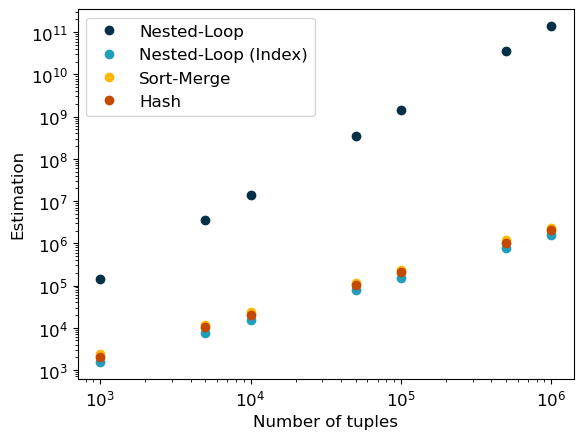

In [14]:
# Sample data
nested_loop = [140140, 3500700, 14001400, 350007000,1400014000, 35000070000, 140000140000]
nested_loop_index = [1540, 7700, 15400, 77000, 154000, 770000,1540000]
sort_merge = [2340, 11700,23400, 117000,234000, 1170000,2340000]
hash = [2040, 10200, 20400, 102000,204000, 1020000,2040000]
x = [1000, 5000, 10000, 50000, 100000, 500000, 1000000]


# nested_loop = [x * 0.000001 for x in nested_loop]
# nested_loop_index = [x * 0.000001 for x in nested_loop_index]
# sort_merge = [x * 0.000001 for x in sort_merge]
# hash = [x * 0.000001 for x in hash]

# Create a plot
plt.figure()
plt.plot(x, nested_loop, marker='o', linestyle='', color=nested_loop_color, label='Nested-Loop')
plt.plot(x, nested_loop_index, marker='o', linestyle='', color=nested_loop_index_color, label='Nested-Loop (Index)')
plt.plot(x, sort_merge, marker='o', linestyle='', color=sort_merge_color, label='Sort-Merge')
plt.plot(x, hash, marker='o', linestyle='', color=hash_color, label='Hash')

plt.xscale('log')
plt.yscale('log')

# Add titles and labels
# plt.title('Estimations for Authors ⋈ Books (Authors are ordered)')
plt.ylabel('Estimation', fontsize = 12)
plt.xlabel('Number of tuples', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 12)

# Save the plot as an SVG file
plt.savefig('estimations_points.svg', format='svg', bbox_inches='tight')
plt.savefig('estimations_points.pdf', format='pdf', bbox_inches='tight')

# Display the plot (optional)
plt.show()

# Selectivity Estimations

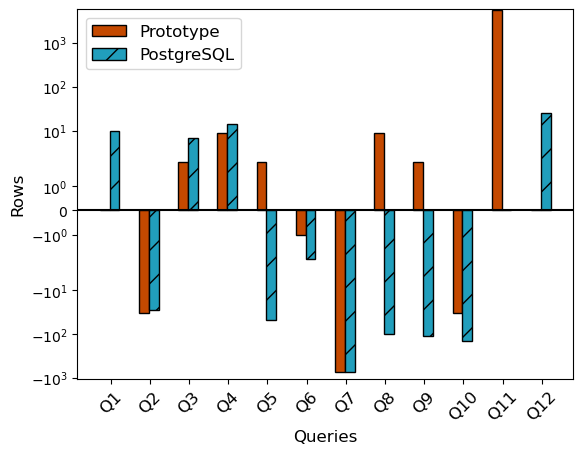

In [15]:
categories = ['Q' + str(i) for i in range(1, 13)]
# schmidi_db_estimated = [1476, 11, 11, 11, 3935, 53, 739, 1374,  1374,  1374, 701, 12345]
# schmidi_db_actual = [1476, 45, 9, 2, 3933, 54, 1476, 1365, 1372, 1407, 54, 12345]
# postgres_estimated = [1486, 16, 16, 16, 3884, 52, 748, 1263, 1263, 1263, 52, 12370]
# postgres_actual = [1476, 45, 9, 2, 3933, 54, 1476, 1365, 1372, 1407, 54, 12345]
schmidi_db_estimated = [1476, 11, 11, 11, 3935, 53, 739, 1374,  1374,  1374, 7000, 12345]
schmidi_db_actual = [1476, 45, 9, 2, 3933, 54, 1476, 1365, 1372, 1407, 1476, 12345]
postgres_estimated = [1486, 16, 16, 16, 3884, 52, 748, 1263, 1263, 1263, 1476, 12370]
postgres_actual = [1476, 45, 9, 2, 3933, 54, 1476, 1365, 1372, 1407, 1476, 12345]
schmidi_db = [ est - act for est, act in zip(schmidi_db_estimated, schmidi_db_actual)]
postgres_db = [ est - act for est, act in zip(postgres_estimated, postgres_actual)]
# Number of bars per category
bar_width = 0.25
index = np.arange(len(categories))

# Create a grouped bar chart
plt.figure()
plt.bar(index, schmidi_db, bar_width, edgecolor='black', label='Prototype', color=hash_color)
plt.bar(index + bar_width, postgres_db, bar_width, edgecolor='black', hatch='/', label='PostgreSQL', color=nested_loop_index_color)
# plt.bar(index + bar_width + bar_width, hash, bar_width, label='Hash', color=hash_color)
# plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# plt.ylim(300000, None)
plt.axhline(y=0, color='black', linestyle='-')
plt.yscale('symlog')
# Add titles and labels
# plt.title('Difference between the estimation and the actual result in rows')
plt.xlabel('Queries', fontsize=12)
plt.ylabel('Rows', fontsize=12)
plt.xticks(index + bar_width -0.1, categories)
plt.xticks(rotation=45, fontsize=12)
plt.legend(fontsize=12)
plt.savefig('selectivity_simple_postgres.svg', format='svg', bbox_inches='tight')
plt.savefig('selectivity_simple_postgres.pdf', format='pdf', bbox_inches='tight')

# Display the plot
plt.show()

In [16]:
vals = ["The Magnificent Books","The Screaming Bakers","The Silver Pirates","Amazing Aliens","The Handsome Queens","The Three Houses","Bleeding Farmers","The Amazing Leaves","The Handsome Courts","The Hiding Knights","The Screaming Leaves","The Two Monkeys","The Blue Chefs","The Dancing Leaves","The Golden Turtles","The Handsome Cats","The Handsome Forests","The Magnificent Fish","The Screaming Capybara","The Screaming Forests","The Silver Tales","The Two Forests","Coughing Vampires","Dancing Monkeys","Dancing Songs","Golden Aliens","Golden Tales","Handsome Tales","The Amazing Capybara","The Bleeding Tales","The Coughing Legends","The Coughing Moons","The Dancing Castles","The Green Mice","The Magnificent Turtles","The Singing Mice","Ugly Turtles","Pretty Stars","The Awesome Castles","The Awesome Vampires","The Awesome Zombies","The Blue Fish","The Blue Fishermen","The Blue Vampires","The Dangerous Chefs","The Handsome Farmers","The Handsome Kings","The Handsome Zombies","The Hiding Tales","The Pretty Castles","The Screaming Anchors","The Silver Courts","The Silver Moons","The Silver Vampires","The Singing Leaves","The Singing Tales","The Talking Aliens","The Talking Tales","The Talking Zombies","The Two Knights","The Two Stones","The Ugly Coins","Two Flowers","Two Turtles","Ugly Chefs","Dancing Castles","Dangerous Princes","Magnificent Fishermen","Magnificent Moons","Pretty Stones","Screaming Princesses","The Amazing Zombies","The Awesome Legends","The Awesome Princesses","The Bleeding Fishermen","The Bleeding Turtles","The Blue Ships","The Blue Worlds","The Dancing Aliens","The Dancing Fishermen","The Dangerous Fish","The Dangerous Princesses","The Golden Fishermen","The Green Turtles","The Handsome Mice","The Handsome Turtles","The Hiding Cities","The Hiding Farmers","The Magnificent Universes","The Pretty Vampires","The Screaming Gems","The Silver Houses","The Singing Castles","The Talking Keys","The Talking Stars","The Talking Vampires","The Talking Worlds","The Three Dogs","The Three Leaves","The Three Songs"]
len(vals)

100

In [17]:
14000140000 / 154000

90910.0

In [18]:
383987770914.286 / 2436141180.000

157.62131278216233

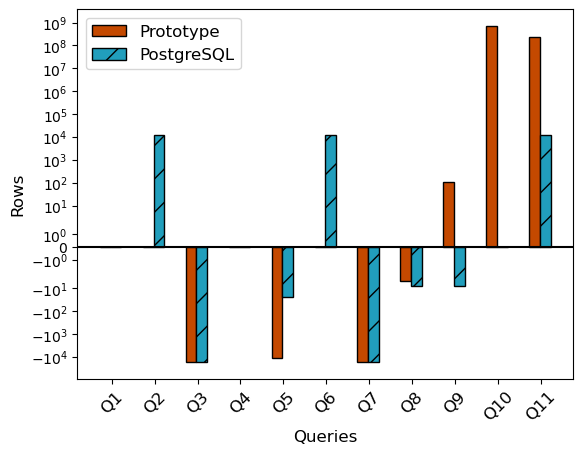

In [19]:
categories = ['Q' + str(i) for i in range(1, 12)]
schmidi_db_estimated = [100000, 87655,  100000, 100000,  76834, 87655, 100000, 29, 137, 700000000, 240100000]
schmidi_db_actual = [100000, 87655, 116770, 100000,  87655,  87655, 116772, 34, 34, 100000, 87655]
postgres_estimated = [100000, 100000, 100000, 100000,  87630, 100000, 100000, 26, 26, 100000, 100000]
postgres_actual = [100000, 87655, 116770, 100000, 87655,  87655, 116772, 34, 34, 100000, 87655]
schmidi_db = [ est - act for est, act in zip(schmidi_db_estimated, schmidi_db_actual)]
postgres_db = [ est - act for est, act in zip(postgres_estimated, postgres_actual)]
# Number of bars per category
bar_width = 0.25
index = np.arange(len(categories))

# Create a grouped bar chart
plt.figure()
plt.bar(index, schmidi_db, bar_width, label='Prototype', edgecolor='black', color=hash_color)
plt.bar(index + bar_width, postgres_db, bar_width, label='PostgreSQL',hatch = '/', edgecolor='black', color=nested_loop_index_color)
# plt.bar(index + bar_width + bar_width, hash, bar_width, label='Hash', color=hash_color)
# plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# plt.ylim(300000, None)
# plt.axhline(y=0, color='black', linestyle='-')
plt.yscale('symlog')
plt.axhline(y=0, color='black', linestyle='-')
# Add titles and labels
# plt.title('Difference between the estimation and the actual result in rows')
plt.xlabel('Queries', fontsize=12)
plt.ylabel('Rows', fontsize=12)
plt.xticks(index + bar_width -0.1, categories)
plt.xticks(rotation=45, fontsize=12)
plt.legend(fontsize=12)
plt.savefig('selectivity_joins_postgres.svg', format='svg', bbox_inches='tight')
plt.savefig('selectivity_joins_postgres.pdf', format='pdf', bbox_inches='tight')

# Display the plot
plt.show()